In [1]:
import glob
import os
import re
import yaml
import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
RESULTS_DIR = '/home/sprasanna/Projects/training-datasets/'
logfiles = glob.glob(os.path.join(RESULTS_DIR,'results*'))
logfiles.sort(key=lambda f: int(filter(str.isdigit, f)))

In [3]:
results = pd.DataFrame(columns=['Hyp_param_set_number', 'Accuracy','Total_time'])

In [4]:
for nfiles in range(len(logfiles)):
    _,filename = os.path.split(logfiles[nfiles])
    df = pd.read_csv(logfiles[nfiles],header=None,names=['Results','Values'],index_col=0)
    results.loc[nfiles] = [filename,df.loc['test acc','Values'],df.loc['total time','Values']]

In [5]:
max_accuracy = results['Accuracy'].idxmax()
accuracy_value = results.loc[max_accuracy, 'Accuracy']
max_accuracy_experiment = results.loc[max_accuracy, 'Hyp_param_set_number']

In [6]:
regex = re.compile(r'\d+')
n_experiment_set = int(regex.findall(max_accuracy_experiment)[0])

Results of hyperparameter sweep experiment:
-------------------------------------------
Maximum accuracy: 0.9426
Experiment set with max accuracy: results_job_id_2.log

{'batch_norm': 'on',
 'batch_size': 512,
 'data_aug_cutout_size': 5,
 'max_learning_rate': 0.4,
 'momentum': 0.9}


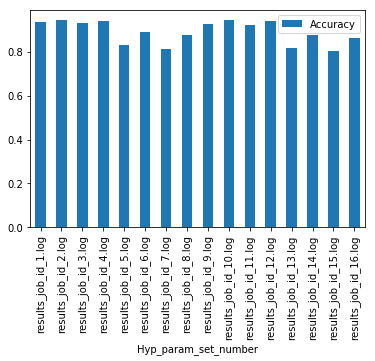

In [7]:
print('Results of hyperparameter sweep experiment:')
print('-------------------------------------------')
print('Maximum accuracy: {}'.format(accuracy_value))
print('Experiment set with max accuracy: {}\n'.format(max_accuracy_experiment))

with open("hyperparams.yml", 'r') as stream:
    hyper_param_set = yaml.load(stream)
pprint.pprint(hyper_param_set[n_experiment_set-1]["hyperparam_set"])

results.plot(x='Hyp_param_set_number',y='Accuracy',kind='bar')

In [8]:
results

,Hyp_param_set_number,Accuracy,Total_time
0,results_job_id_1.log,0.9347,117.764999
1,results_job_id_2.log,0.9426,75.399140
2,results_job_id_3.log,0.9301,119.592690
3,results_job_id_4.log,0.9397,75.619865
4,results_job_id_5.log,0.8285,117.680233
5,results_job_id_6.log,0.8883,74.556600
6,results_job_id_7.log,0.8129,114.646887
7,results_job_id_8.log,0.8737,74.983109
8,results_job_id_9.log,0.9274,116.857387
9,results_job_id_10.log,0.9419,75.062058
